<a href="https://colab.research.google.com/github/djdtimit/Deep-Learning/blob/master/convnet_small_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a convnet from scratch on a small dataset

starting point: training a small convnet without any regularization to set a baseline, problem: overfitting

to tackle overfitting afterwards: data augmentation



## The relevance of deep learning for small-data problems

It isn’t possible to train a convnet to solve a
complex problem with just a few tens of samples, but a few hundred can potentially
suffice if the model is small and well regularized and the task is simple. Because conv-
nets learn local, translation-invariant features, they’re highly data efficient on percep-
tual problems. Training a convnet from scratch on a very small image dataset will still
yield reasonable results despite a relative lack of data, without the need for any custom
feature engineering.

What’s more, deep-learning models are by nature highly repurposable: you can
take, say, an image-classification or speech-to-text model trained on a large-scale dataset
and reuse it on a significantly different problem with only minor changes.

## Downloading the data from Kaggle: http://www.kaggle.com/c/dogs-vs-cats/data

Only a subset of the original data is used

In [0]:
import os, shutil

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
original_dataset_dir = '/content/gdrive/My Drive/Colab Notebooks/dogs_vs_cats/train'

In [0]:
base_dir = '/content/gdrive/My Drive/Colab Notebooks/dogs_vs_cats/cats_and_dogs_small'

In [13]:
os.mkdir(base_dir)

FileExistsError: ignored

In [0]:
train_dir = os.path.join(base_dir, 'train')

In [15]:
os.mkdir(train_dir)

FileExistsError: ignored

In [0]:
validation_dir = os.path.join(base_dir, 'validation')

In [17]:
os.mkdir(validation_dir)

FileExistsError: ignored

In [0]:
test_dir = os.path.join(base_dir, 'test')

In [19]:
os.mkdir(test_dir)

FileExistsError: ignored

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')

In [21]:
os.mkdir(train_cats_dir)

FileExistsError: ignored

In [0]:
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [23]:
os.mkdir(train_dogs_dir)

FileExistsError: ignored

In [0]:
validation_cats_dir = os.path.join(validation_dir, 'cats')

In [25]:
os.mkdir(validation_cats_dir)

FileExistsError: ignored

In [0]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [27]:
os.mkdir(validation_dogs_dir)

FileExistsError: ignored

In [0]:
test_cats_dir = os.path.join(test_dir, 'cats')

In [29]:
os.mkdir(test_cats_dir)

FileExistsError: ignored

In [0]:
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [31]:
os.mkdir(test_dogs_dir)

FileExistsError: ignored

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [0]:
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src, dst)

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]

In [0]:
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src, dst)

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]

In [0]:
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src, dst)

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

In [0]:
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

In [0]:
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

In [0]:
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [44]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))

total training cat images:  1000


In [45]:
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))

total validation cat images:  500


In [46]:
print('total test cat images: ', len(os.listdir(test_cats_dir)))

total test cat images:  500


In [47]:
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

total training dog images:  1000


In [48]:
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))

total validation dog images:  500


In [49]:
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total test dog images:  500


## Building the network

larger network due to bigger images and a more complex problem: to augment the capacity of the network and to further reduce the size of the feature maps

In [0]:
from keras import layers
from keras import models

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dense(units=1,activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [0]:
from keras import optimizers

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

## Data preprocessing

1. Read the picture files
2. Decode the JPEG content to RGB grids of pixels
3. Convert these into floating-point tensors
4. Rescale the pixel values (between 0 and 255) to the [0,1] interval

=> use Keras utilities: ImageDataGenerator

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [66]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary' # because binary labels are needed
)

Found 2000 images belonging to 2 classes.


In [67]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary' # because binary labels are needed
)

Found 1000 images belonging to 2 classes.


In [68]:
# 20 = batch_size
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape: ', labels_batch.shape)
  break # otherwise the generator would loop endlessly

data batch shape: (20, 150, 150, 3)
labels batch shape:  (20,)


In [70]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100, # 2000 / 20
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=50 # 1000 / 20
)


Epoch 1/30
100/100 [==============================] - 21s 206ms/step - loss: 0.6849 - acc: 0.5345 - val_loss: 0.6675 - val_acc: 0.5940
Epoch 2/30
100/100 [==============================] - 13s 130ms/step - loss: 0.6494 - acc: 0.6125 - val_loss: 0.6665 - val_acc: 0.5800
Epoch 3/30
100/100 [==============================] - 13s 131ms/step - loss: 0.5957 - acc: 0.6750 - val_loss: 0.6204 - val_acc: 0.6360
Epoch 4/30
100/100 [==============================] - 13s 131ms/step - loss: 0.5633 - acc: 0.7015 - val_loss: 0.6510 - val_acc: 0.6420
Epoch 5/30
100/100 [==============================] - 13s 134ms/step - loss: 0.5447 - acc: 0.7160 - val_loss: 0.5870 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 13s 131ms/step - loss: 0.5174 - acc: 0.7370 - val_loss: 0.6290 - val_acc: 0.6420
Epoch 7/30
100/100 [==============================] - 13s 130ms/step - loss: 0.4987 - acc: 0.7520 - val_loss: 0.5745 - val_acc: 0.7030
Epoch 8/30
100/100 [==============================] - 

In [0]:
model.save(os.path.join(base_dir,'cats_and_dogs_small_1.h5'))

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(1,len(acc) + 1)

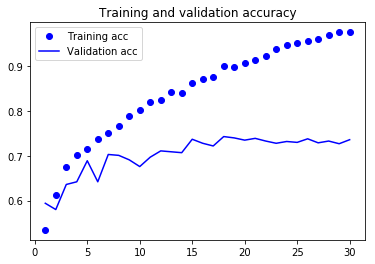

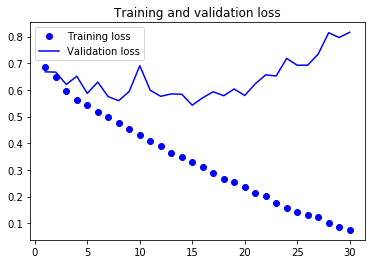

In [76]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy'c)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

overfitting: training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70-72%. => not enough training data

## Using data augmentation

Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, the model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In [0]:
datagen = ImageDataGenerator(
    rotation_range=40, # degrees: a range within which to randomly rotate pictures
    width_shift_range=0.2,
    height_shift_range=0.2, # ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
    shear_range = 0.2, # randomly applying shearing transformation
    zoom_range=0.2, # randomly zooming inside pictures
    horizontal_flip=True, # ramdomly flipping half the images horizontally
    fill_mode='nearest' # strategy used for filling in newly created pixels
)

In [0]:
from keras.preprocessing import image

In [0]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [0]:
img_path = fnames[3]

In [0]:
img = image.load_img(img_path, target_size=(150,150)) 

In [0]:
x = image.img_to_array(img) # to Numpy array

In [0]:
x = x.reshape((1,) + x.shape) # reshape to (1,150,150,3)

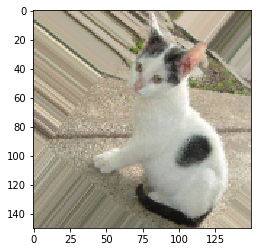

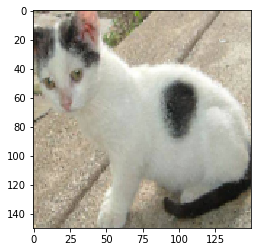

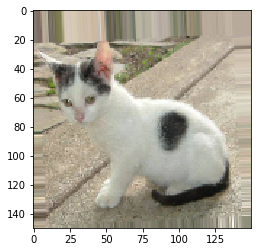

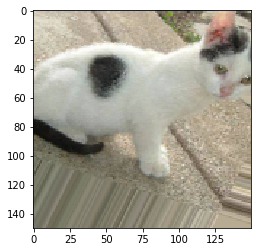

In [88]:
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

If a new network with this data-augmentation configuration is trained, the network will never see the same input twice. But the input it sees are still heavily intercorrelated, because they come from a small number of original images-it can't produce new information, it can only remix existing information. As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, Dropout is added to the model, right before the densely connected classifier

In [89]:
model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dense(units=1,activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255) # validation data shouldn't be augmented

In [93]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [94]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [95]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 39s 392ms/step - loss: 0.6909 - acc: 0.5209 - val_loss: 0.6776 - val_acc: 0.5825
Epoch 2/100
100/100 [==============================] - 36s 359ms/step - loss: 0.6783 - acc: 0.5578 - val_loss: 0.6764 - val_acc: 0.5341
Epoch 3/100
100/100 [==============================] - 36s 364ms/step - loss: 0.6658 - acc: 0.5856 - val_loss: 0.6422 - val_acc: 0.6110
Epoch 4/100
100/100 [==============================] - 35s 351ms/step - loss: 0.6468 - acc: 0.6119 - val_loss: 0.6412 - val_acc: 0.5902
Epoch 5/100
100/100 [==============================] - 34s 341ms/step - loss: 0.6331 - acc: 0.6287 - val_loss: 0.6415 - val_acc: 0.6440
Epoch 6/100
100/100 [==============================] - 38s 379ms/step - loss: 0.6185 - acc: 0.6572 - val_loss: 0.6335 - val_acc: 0.6218
Epoch 7/100
100/100 [==============================] - 35s 354ms/step - loss: 0.5986 - acc: 0.6712 - val_loss: 0.6014 - val_acc: 0.6605
Epoch 8/100
100/100 [===========================

In [0]:
model.save(os.path.join(base_dir, 'cats_and_dogs_small_h2.h5'))

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(1,len(acc) + 1)

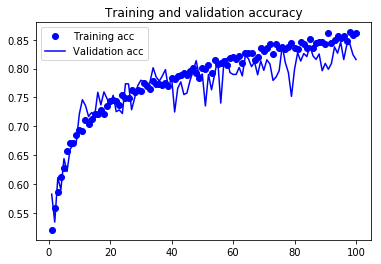

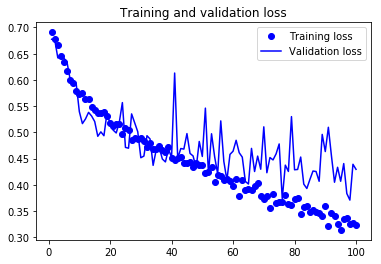

In [100]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

=> no overfitting

By using regularization techniques even further, and by tuning the network's parameters (suchas the number of filters per convolution layer, or the number of layers in the network), it would be possible to get an even better accuracy. But it would prove difficult to go any higher just by training a connet from scratch, because there is too little data to work with. As a next step to improve the accuracy on this problem, a pretrained model can be used.